In [1]:
 pip install imbalanced-learn

In [2]:
pip install transformers torch

In [3]:
pip install huggingface-hub

In [4]:
#general purpose packages
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


#data processing
import nltk
import re
import string
import torch
import random

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

from nltk.corpus import stopwords
from tqdm.notebook import tqdm
from datetime import datetime, timedelta
from collections import OrderedDict
from nltk.tokenize import word_tokenize
from textblob import TextBlob


#transformers
from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup




#keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

#set seed for reproducibility
seed=42

#set style for plots
sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlepad=10)

<ipython-input-4-603b1ef4a5c1>:56: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


<Figure size 640x480 with 0 Axes>

In [5]:
import os

Global Variable

In [6]:
random_state = 42

In [7]:
from transformers import TFAutoModel,AutoTokenizer

In [8]:
df = pd.read_csv("/content/drive/MyDrive/ML Assignment Dataset - Train.csv")

In [9]:
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
8584,Ipad everywhere. #SXSW {link},iPad,Positive emotion
8585,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
8586,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
8587,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


#Preprocess the data

Data cleaning

In [10]:
df = df.drop("emotion_in_tweet_is_directed_at", axis = 1)

In [11]:
df.dropna(subset=["tweet_text"], inplace=True)

In [12]:
def clean_tweet(tweet):
    # Remove mentions
    tweet = re.sub(r'@[\w]+', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#[\w]+', '', tweet)
    # Remove special characters and links
    tweet = re.sub(r'[^a-zA-Z\s]', '', tweet)
    # Remove URLs
    tweet = re.sub(r'http\S+', '', tweet)
    # Convert to lowercase
    tweet = tweet.lower()
    return tweet

# Apply the cleaning function to the 'tweets' column
df['cleaned_tweets'] = df['tweet_text'].apply(clean_tweet)

df

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product,cleaned_tweets
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,i have a g iphone after hrs tweeting at it ...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,know about awesome ipadiphone app that youl...
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,can not wait for also they should sale them...
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,i hope this years festival isnt as crashy as ...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,great stuff on fri marissa mayer google tim ...
...,...,...,...
8584,Ipad everywhere. #SXSW {link},Positive emotion,ipad everywhere link
8585,"Wave, buzz... RT @mention We interrupt your re...",No emotion toward brand or product,wave buzz rt we interrupt your regularly sche...
8586,"Google's Zeiger, a physician never reported po...",No emotion toward brand or product,googles zeiger a physician never reported pote...
8587,Some Verizon iPhone customers complained their...,No emotion toward brand or product,some verizon iphone customers complained their...


In [13]:
df = df.drop("tweet_text",axis=1)

In [14]:
df

,is_there_an_emotion_directed_at_a_brand_or_product,cleaned_tweets
0,Negative emotion,i have a g iphone after hrs tweeting at it ...
1,Positive emotion,know about awesome ipadiphone app that youl...
2,Positive emotion,can not wait for also they should sale them...
3,Negative emotion,i hope this years festival isnt as crashy as ...
4,Positive emotion,great stuff on fri marissa mayer google tim ...
...,...,...
8584,Positive emotion,ipad everywhere link
8585,No emotion toward brand or product,wave buzz rt we interrupt your regularly sche...
8586,No emotion toward brand or product,googles zeiger a physician never reported pote...
8587,No emotion toward brand or product,some verizon iphone customers complained their...


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8588 entries, 0 to 8588
Data columns (total 2 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   is_there_an_emotion_directed_at_a_brand_or_product  8588 non-null   object
 1   cleaned_tweets                                      8588 non-null   object
dtypes: object(2)
memory usage: 201.3+ KB


In [16]:
df.rename(columns={'is_there_an_emotion_directed_at_a_brand_or_product': 'emotion'}, inplace=True)

# Reorder the columns
df = df[['cleaned_tweets','emotion',]]

In [17]:
df

,cleaned_tweets,emotion
0,i have a g iphone after hrs tweeting at it ...,Negative emotion
1,know about awesome ipadiphone app that youl...,Positive emotion
2,can not wait for also they should sale them...,Positive emotion
3,i hope this years festival isnt as crashy as ...,Negative emotion
4,great stuff on fri marissa mayer google tim ...,Positive emotion
...,...,...
8584,ipad everywhere link,Positive emotion
8585,wave buzz rt we interrupt your regularly sche...,No emotion toward brand or product
8586,googles zeiger a physician never reported pote...,No emotion toward brand or product
8587,some verizon iphone customers complained their...,No emotion toward brand or product


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8588 entries, 0 to 8588
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   cleaned_tweets  8588 non-null   object
 1   emotion         8588 non-null   object
dtypes: object(2)
memory usage: 201.3+ KB


In [19]:
df.describe()

,cleaned_tweets,emotion
count,8588,8588
unique,8460,4
top,rt google to launch major new social network ...,No emotion toward brand or product
freq,9,5388


In [20]:
df.drop_duplicates(subset=['cleaned_tweets'], inplace=True)

# Resetting the index after dropping duplicates
df.reset_index(drop=True, inplace=True)

<ipython-input-20-dc43a940fba6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset=['cleaned_tweets'], inplace=True)


In [21]:
df

,cleaned_tweets,emotion
0,i have a g iphone after hrs tweeting at it ...,Negative emotion
1,know about awesome ipadiphone app that youl...,Positive emotion
2,can not wait for also they should sale them...,Positive emotion
3,i hope this years festival isnt as crashy as ...,Negative emotion
4,great stuff on fri marissa mayer google tim ...,Positive emotion
...,...,...
8455,ipad everywhere link,Positive emotion
8456,wave buzz rt we interrupt your regularly sche...,No emotion toward brand or product
8457,googles zeiger a physician never reported pote...,No emotion toward brand or product
8458,some verizon iphone customers complained their...,No emotion toward brand or product


In [22]:
df.describe()

,cleaned_tweets,emotion
count,8460,8460
unique,8460,4
top,i have a g iphone after hrs tweeting at it ...,No emotion toward brand or product
freq,1,5308


In [23]:
df["emotion"].value_counts()

No emotion toward brand or product    5308
Positive emotion                      2629
Negative emotion                       514
I can't tell                             9
Name: emotion, dtype: int64

In [24]:
fig1 = px.bar(df['emotion'].value_counts(), x=df['emotion'].value_counts().index, y=df['emotion'].value_counts().values, labels={'x': 'Emotion', 'y': 'Count'})
fig1.update_layout(title='Distribution of Emotions')
fig1.show()

In [25]:
# Assuming "Angry" is the value you want to remove
df.drop(df[df["emotion"] == "I can't tell"].index, inplace=True)


<ipython-input-25-8d0278427715>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
df["emotion"].value_counts()

No emotion toward brand or product    5308
Positive emotion                      2629
Negative emotion                       514
Name: emotion, dtype: int64

In [27]:
fig1 = px.bar(df['emotion'].value_counts(), x=df['emotion'].value_counts().index, y=df['emotion'].value_counts().values, labels={'x': 'Emotion', 'y': 'Count'})
fig1.update_layout(title='Distribution of Emotions')
fig1.show()

In [28]:
df

,cleaned_tweets,emotion
0,i have a g iphone after hrs tweeting at it ...,Negative emotion
1,know about awesome ipadiphone app that youl...,Positive emotion
2,can not wait for also they should sale them...,Positive emotion
3,i hope this years festival isnt as crashy as ...,Negative emotion
4,great stuff on fri marissa mayer google tim ...,Positive emotion
...,...,...
8455,ipad everywhere link,Positive emotion
8456,wave buzz rt we interrupt your regularly sche...,No emotion toward brand or product
8457,googles zeiger a physician never reported pote...,No emotion toward brand or product
8458,some verizon iphone customers complained their...,No emotion toward brand or product


In [29]:
df.columns

Index(['cleaned_tweets', 'emotion'], dtype='object')

In [30]:
df

,cleaned_tweets,emotion
0,i have a g iphone after hrs tweeting at it ...,Negative emotion
1,know about awesome ipadiphone app that youl...,Positive emotion
2,can not wait for also they should sale them...,Positive emotion
3,i hope this years festival isnt as crashy as ...,Negative emotion
4,great stuff on fri marissa mayer google tim ...,Positive emotion
...,...,...
8455,ipad everywhere link,Positive emotion
8456,wave buzz rt we interrupt your regularly sche...,No emotion toward brand or product
8457,googles zeiger a physician never reported pote...,No emotion toward brand or product
8458,some verizon iphone customers complained their...,No emotion toward brand or product


In [31]:
df.drop_duplicates(subset='cleaned_tweets',inplace=True)

<ipython-input-31-fea988079702>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
df.dropna(subset=['cleaned_tweets', 'emotion'], inplace=True)

<ipython-input-32-98cbbc8e414f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
df.head()

,cleaned_tweets,emotion
0,i have a g iphone after hrs tweeting at it ...,Negative emotion
1,know about awesome ipadiphone app that youl...,Positive emotion
2,can not wait for also they should sale them...,Positive emotion
3,i hope this years festival isnt as crashy as ...,Negative emotion
4,great stuff on fri marissa mayer google tim ...,Positive emotion


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8451 entries, 0 to 8459
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   cleaned_tweets  8451 non-null   object
 1   emotion         8451 non-null   object
dtypes: object(2)
memory usage: 198.1+ KB


In [35]:
text_len = []
for text in df.cleaned_tweets:
    tweet_len = len(text.split())
    text_len.append(tweet_len)

In [36]:
df['text_len'] = text_len

<ipython-input-36-5bfdd5f14fa3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-37-6f9c3b55e95c>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




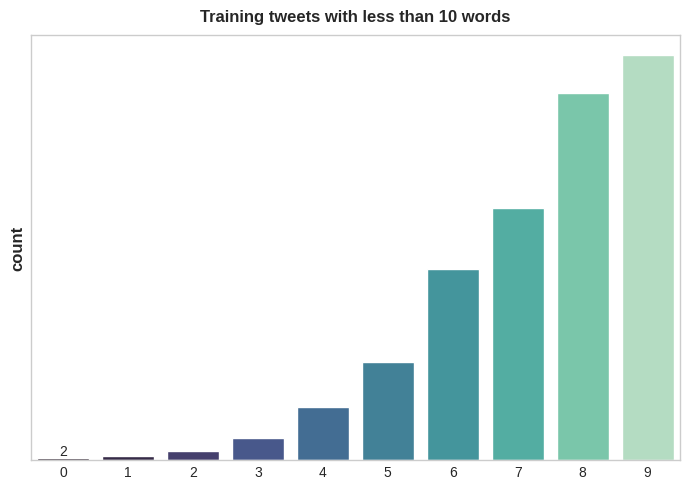

In [37]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x='text_len', data=df[df['text_len']<10], palette='mako')
plt.title('Training tweets with less than 10 words')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [38]:
print(f" DF TRAIN SHAPE: {df.shape}")


 DF TRAIN SHAPE: (8451, 3)


In [39]:
df.describe()

,text_len
count,8451.000000
mean,14.761212
std,4.925746
min,0.000000
25%,11.000000
50%,15.000000
75%,18.000000
max,29.000000


In [40]:
df = df[df['text_len'] > 4]

In [41]:
df.drop('text_len',axis =1 , inplace = True)

<ipython-input-41-ac464a1d5e6d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [42]:
print(f" DF TRAIN SHAPE: {df.shape}")

 DF TRAIN SHAPE: (8364, 2)


In [43]:
df['emotion'].value_counts()

No emotion toward brand or product    5240
Positive emotion                      2611
Negative emotion                       513
Name: emotion, dtype: int64

Lables pre-processing

In [44]:
df['emotion_number'] = df['emotion'].map({'Negative emotion':0,'No emotion toward brand or product':1,'Positive emotion':2})

<ipython-input-44-73a234cab75d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
df['emotion'] = df['emotion'].map({'Negative emotion':0,'No emotion toward brand or product':1,'Positive emotion':2})

<ipython-input-45-7d1496a275d7>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [46]:
df['emotion'].value_counts()

1    5240
2    2611
0     513
Name: emotion, dtype: int64

In [47]:
df

,cleaned_tweets,emotion,emotion_number
0,i have a g iphone after hrs tweeting at it ...,0,0
1,know about awesome ipadiphone app that youl...,2,2
2,can not wait for also they should sale them...,2,2
3,i hope this years festival isnt as crashy as ...,0,0
4,great stuff on fri marissa mayer google tim ...,2,2
...,...,...,...
8454,yup but i dont have a third app yet im on and...,1,1
8456,wave buzz rt we interrupt your regularly sche...,1,1
8457,googles zeiger a physician never reported pote...,1,1
8458,some verizon iphone customers complained their...,1,1


In [48]:
emotion_number_counts = df["emotion"].value_counts().reset_index()
emotion_number_counts.columns = ["emotion", "count"]

In [49]:
emotion_number_counts

,emotion,count
0,1,5240
1,2,2611
2,0,513


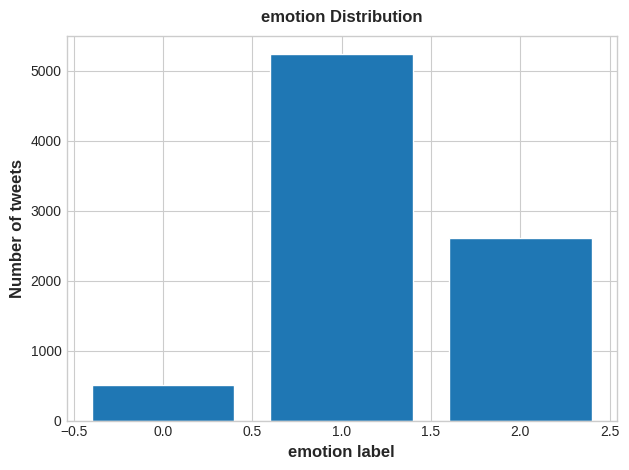

In [50]:
plt.bar(emotion_number_counts["emotion"], emotion_number_counts["count"])

# Set labels and title
plt.xlabel("emotion label")
plt.ylabel("Number of tweets")
plt.title("emotion Distribution")

# Show the plot
plt.show()

## Train & Test sets

In [51]:
X = df['cleaned_tweets']
y = df['emotion']

In [52]:
# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create new dataframes for training and testing data
df_train = pd.DataFrame({'cleaned_tweets': X_train, 'emotion': y_train})
df_test = pd.DataFrame({'cleaned_tweets': X_test, 'emotion': y_test})

In [53]:
print(df.shape)
print(df_train.shape)
print(df_test.shape)

(8364, 3)
(6691, 2)
(1673, 2)


In [54]:
df_test

,cleaned_tweets,emotion
2449,smartphone breakdown at unofficial iphones ...,1
6905,link report apple to open popup store at,1
6663,looking forward to the iphone and android desi...,2
5853,rt marissa mayer will connect the digital am...,1
5457,rt google says reports about launch of circle...,1
...,...,...
1142,flipboard to launch iphone app later this year...,1
2004,wonder what theyll have up their sleeves rt ...,1
2383,at the android party and kinda embarrassed by ...,0
5025,rt any fans in town for stop by the austin ...,1


## Balance the labels of the training set

In [55]:
ros = RandomOverSampler()
train_x, train_y = ros.fit_resample(np.array(df_train['cleaned_tweets']).reshape(-1, 1), np.array(df_train['emotion']).reshape(-1, 1));
df_train_os = pd.DataFrame(list(zip([x[0] for x in train_x], train_y)), columns = ['cleaned_tweets', 'emotion']);

In [56]:
df_train_os

,cleaned_tweets,emotion
0,is walking around while staring down at my i...,1
1,googles mobile future and the elusive power of...,1
2,team android choice awards finalists announced...,1
3,wondering about circles gt google to reveal a ...,1
4,cant wait to see on friday at the morning af...,1
...,...,...
12535,venturebeat rt on its second day in business ...,2
12536,team android at sxsw full party details revea...,2
12537,is so smart to open a popup store in while ...,2
12538,google dev at the panel indicates that android...,2


In [57]:
df_train_os['emotion'].value_counts()

1    4180
2    4180
0    4180
Name: emotion, dtype: int64

In [58]:
train_emotion_counts = df_train_os["emotion"].value_counts().reset_index()
train_emotion_counts.columns = ["emotion", "count"]

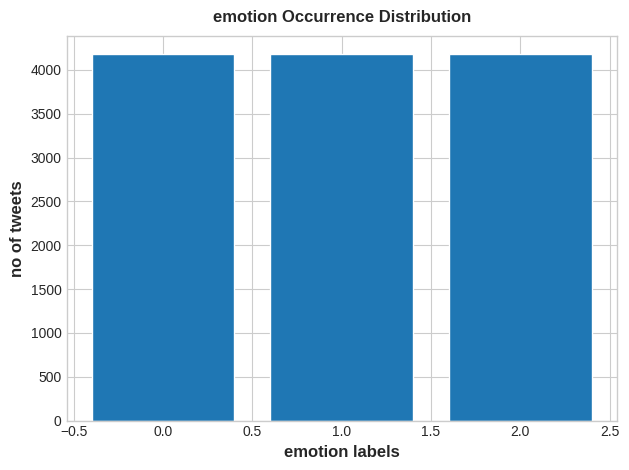

In [59]:
# Plot the graph
plt.bar(train_emotion_counts["emotion"], train_emotion_counts["count"])

# Set labels and title
plt.xlabel("emotion labels")
plt.ylabel("no of tweets")
plt.title("emotion Occurrence Distribution")

# Show the plot
plt.show()

In [60]:
df_train_os.columns

Index(['cleaned_tweets', 'emotion'], dtype='object')

In [61]:
df_train_os

,cleaned_tweets,emotion
0,is walking around while staring down at my i...,1
1,googles mobile future and the elusive power of...,1
2,team android choice awards finalists announced...,1
3,wondering about circles gt google to reveal a ...,1
4,cant wait to see on friday at the morning af...,1
...,...,...
12535,venturebeat rt on its second day in business ...,2
12536,team android at sxsw full party details revea...,2
12537,is so smart to open a popup store in while ...,2
12538,google dev at the panel indicates that android...,2


In [62]:
df_train_os['emotion_number'] = df_train_os['emotion']

In [63]:
df_train_os

,cleaned_tweets,emotion,emotion_number
0,is walking around while staring down at my i...,1,1
1,googles mobile future and the elusive power of...,1,1
2,team android choice awards finalists announced...,1,1
3,wondering about circles gt google to reveal a ...,1,1
4,cant wait to see on friday at the morning af...,1,1
...,...,...,...
12535,venturebeat rt on its second day in business ...,2,2
12536,team android at sxsw full party details revea...,2,2
12537,is so smart to open a popup store in while ...,2,2
12538,google dev at the panel indicates that android...,2,2


In [64]:
text = df_train_os['cleaned_tweets'].values
labels = df_train_os['emotion'].values

In [65]:
print(text.shape)
print(labels.shape)

(12540,)
(12540,)


## Tokenize

In [66]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=len(train_emotion_counts), output_attentions=False, output_hidden_states=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


#### Get the token_ids and attention_masks

In [67]:
token_ids = []
attention_masks = []
for description in text:
  encoding_dict = tokenizer.encode_plus(description, add_special_tokens=True, max_length=256 ,  pad_to_max_length=True, return_attention_mask=True, return_tensors="pt")
  token_ids.append(encoding_dict["input_ids"])
  attention_masks.append(encoding_dict["attention_mask"])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



#### Get in torch tensors

In [68]:
token_ids = torch.cat(token_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

In [69]:
token_ids[1]

tensor([  101,  8224,  2015,  4684,  2925,  1998,  1996, 26475,  2373,  1997,
         2182, 28940,  4140,  9123,   102,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0, 

In [70]:
attention_masks[1]

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [71]:
labels

tensor([1, 1, 1,  ..., 2, 2, 2])

## Train & Validation sets

In [72]:
# Parameters
val_ratio = 0.2
batch_size = 16

# Indices of the train and validation splits stratified by labels
train_df, val_df = train_test_split(np.arange(len(labels)), test_size= 0.2 , shuffle=True, stratify=labels, random_state=random_state)

# Prepare TensorsDataset
train_set = TensorDataset(token_ids[train_df], attention_masks[train_df], labels[train_df])
val_set = TensorDataset(token_ids[val_df], attention_masks[val_df], labels[val_df])

# Prepare DataLoader
train_dataloader = DataLoader(train_set, sampler=RandomSampler(train_set), batch_size=batch_size)
val_dataloader = DataLoader(val_set, sampler=SequentialSampler(val_set), batch_size=batch_size)

## Training

## Validation metrics

In [73]:
def f1_score_func(predictions, labels):
    preds_flat = np.argmax(predictions, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average="weighted")

In [74]:
label_dict = pd.Series(df["emotion"].values, index=df["emotion"]).to_dict()

In [75]:
label_dict

{0: 0, 2: 2, 1: 1}

In [76]:
def accuracy_per_class(predictions, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}

    predictions_flat = np.argmax(predictions, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_predictions = predictions_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f"Class: {label_dict_inverse[label]}")
        print(f"Accuracy: {len(y_predictions[y_predictions==label])}/{len(y_true)}\n")

#### Training Setup

In [77]:
epochs = 1
optimizer = AdamW(model.parameters(), lr=1e-5, eps=1e-8)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(train_dataloader)*epochs)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning:

This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning



In [78]:
random.seed(random_state)
np.random.seed(random_state)
torch.manual_seed(random_state)
torch.cuda.manual_seed_all(random_state)

In [79]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print(device)

cuda


#### Training

In [80]:
def evaluate(val_dataloader):

    model.eval()

    loss_val_total = 0
    predictions, true_vals = [], []

    for batch in val_dataloader:

        batch = tuple(b.to(device) for b in batch)

        inputs = {"input_ids":      batch[0],
                  "attention_mask": batch[1],
                  "labels":         batch[2],
                 }

        with torch.no_grad():
            outputs = model(**inputs)

        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs["labels"].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)

    loss_val_avg = loss_val_total/len(val_dataloader)

    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
    return loss_val_avg, predictions, true_vals

In [81]:
for epoch in tqdm(range(1, epochs+1)):

    model.train()

    loss_train_total = 0

    progress_bar = tqdm(train_dataloader, desc="Epoch {:1d}".format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()

        batch = tuple(b.to(device) for b in batch)

        inputs = {"input_ids":      batch[0],
                  "attention_mask": batch[1],
                  "labels":         batch[2],
                 }

        outputs = model(**inputs)

        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()

        progress_bar.set_postfix({"training_loss": "{:.3f}".format(loss.item()/len(batch))})


    torch.save(model.state_dict(), f"/content/finetuned_BERT_epoch_{epoch}.model")

    tqdm.write(f"\nEpoch {epoch}")

    loss_train_avg = loss_train_total/len(train_dataloader)
    tqdm.write(f"Training loss: {loss_train_avg}")

    val_loss, predictions, true_vals = evaluate(val_dataloader)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f"Validation loss: {val_loss}")
    tqdm.write(f"F1 Score (Weighted): {val_f1}")

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/627 [00:00<?, ?it/s]


Epoch 1
Training loss: 0.7388378165935595
Validation loss: 0.5759984247244088
F1 Score (Weighted): 0.7383749492540569


In [82]:
predictions

array([[-2.4779785 ,  0.8948031 ,  1.5144928 ],
       [ 2.3609195 , -0.9108159 , -0.7841448 ],
       [-0.6893884 , -0.13749698,  1.0333619 ],
       ...,
       [-2.3447695 ,  1.3228139 ,  0.8750451 ],
       [-0.79108894,  0.9151727 , -0.29632074],
       [-2.31989   ,  1.6231537 ,  0.3006864 ]], dtype=float32)

In [83]:
val_loss

0.5759984247244088

## Predict

#### Prepare the data


In [84]:
test_text = df_test["cleaned_tweets"].values
test_labels = df_test["emotion"].values

In [85]:
test_token_ids = []
test_attention_masks = []
for test_description in test_text:
  test_encoding_dict = tokenizer.encode_plus(test_description, add_special_tokens=True, max_length=256, pad_to_max_length=True, return_attention_mask=True, return_tensors="pt")
  test_token_ids.append(test_encoding_dict["input_ids"])
  test_attention_masks.append(test_encoding_dict["attention_mask"])

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



In [86]:
test_token_ids = torch.cat(test_token_ids, dim=0)
test_attention_masks = torch.cat(test_attention_masks, dim=0)
test_labels = torch.tensor(test_labels)

In [87]:
test_set = TensorDataset(test_token_ids, test_attention_masks, test_labels)
test_dataloader = DataLoader(test_set, sampler=RandomSampler(test_set), batch_size=batch_size)

#### Evaluate the test samples

In [88]:
_, test_predictions, test_true_vals = evaluate(test_dataloader)

In [89]:
test_f1_weighted = f1_score_func(test_predictions, test_true_vals)
print(f"F1 Score (Weighted): {test_f1_weighted}")

F1 Score (Weighted): 0.6578703208558528


In [90]:
accuracy_per_class(test_predictions, test_true_vals)

Class: 0
Accuracy: 63/90

Class: 1
Accuracy: 682/1060

Class: 2
Accuracy: 331/523



In [91]:
model_path = "/content/finetuned_BERT_epoch_1"
os.makedirs(model_path, exist_ok=True)  # Create the directory if it doesn't exist
model.save_pretrained(model_path)

In [92]:
# prompt: whats the above error and how to fix it

!pip install pytorch-lightning


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.1/778.1 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.2/840.2 kB 18.8 MB/s eta 0:00:00


In [93]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification

In [94]:
model = BertForSequenceClassification.from_pretrained("/content/finetuned_BERT_epoch_1")

In [95]:
from huggingface_hub import notebook_login

notebook_login()

In [97]:
model.push_to_hub("nikhilraj7700/MModel")

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/nikhilraj7700/MModel/commit/c6ebcb24a0e3d614929917d83a1426cb5360cda1', commit_message='Upload BertForSequenceClassification', commit_description='', oid='c6ebcb24a0e3d614929917d83a1426cb5360cda1', pr_url=None, pr_revision=None, pr_num=None)

In [98]:
model = BertForSequenceClassification.from_pretrained("nikhilraj7700/MModel")

config.json:   0%|          | 0.00/927 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

In [99]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,